In [1]:
1. What are the objectives of using Selective Search in R-CNN?

Answer(1):

Selective Search is not used in R-CNN (Region-based Convolutional Neural Network) models. Selective Search is a separate algorithm used for generating region proposals, while R-CNN models are used for object detection and localization. However, Selective Search can be used in conjunction with R-CNN models to provide region proposals for subsequent processing.

The objectives of using Selective Search in the context of R-CNN or similar object detection pipelines are as follows:

1. Region Proposal Generation: The primary objective of using Selective Search is to efficiently generate a set of region proposals that are likely to contain objects of interest in an image. This helps reduce the computational load of processing the entire image with an object detection model.

2. Selective Search reduces the number of potential regions that need to be processed by the R-CNN model, saving both time and computational resources.

3. Diverse Region Proposals: Selective Search is designed to produce a diverse set of region proposals that cover a wide range of object sizes, shapes, and textures. This diversity is beneficial for object detection, as it increases the likelihood of capturing objects of varying appearances.

4. Handling Multiple Objects: Selective Search can identify multiple objects within an image, making it suitable for multi-object detection tasks.

5. Efficient Preprocessing: By using Selective Search, the R-CNN model can focus on a smaller subset of regions instead of examining the entire image. This leads to more efficient processing and faster object detection.

In summary, the use of Selective Search in R-CNN and similar object detection pipelines is aimed at providing an effective and efficient way to generate region proposals, thereby improving the overall speed and accuracy of object detection tasks. Selective Search is just one of the methods for region proposal generation, and newer object detection architectures may use alternative approaches, such as anchor-based methods (e.g., Faster R-CNN) or anchor-free methods (e.g., CenterNet).

SyntaxError: invalid syntax (2791708752.py, line 3)

2. Explain the following phases involved in R-CNN:

Answer(2):

a. Region proposal

b. Warping and Resizing

c. Pre trained CNN architecture

d. Pre Trained SVM models

e. Clean up

f. Implementation of bounding box


a. Region proposal

===================


Region proposals in R-CNN (Region-based Convolutional Neural Network) are candidate bounding boxes or regions of interest (RoIs) within an input image that potentially contain objects. Region proposals are a crucial step in the R-CNN pipeline, as they help focus the subsequent object detection and classification steps on a smaller, more manageable set of regions, reducing computational complexity and speeding up the process.

The process of generating region proposals in R-CNN typically involves the following steps:

1. **Region Proposal Generation**: Initially, a method or algorithm is used to generate a large number of potential region proposals in an image. These proposals are bounding boxes that may or may not contain objects. There are various algorithms for region proposal generation, and one of the commonly used methods in early R-CNN architectures was Selective Search. Other methods, such as EdgeBoxes or the region proposal network (RPN) in Faster R-CNN, have been developed to generate region proposals.

2. **Candidate Bounding Boxes**: The generated region proposals are typically represented as bounding boxes, each defined by its coordinates (x, y) for the top-left corner and (width, height). These boxes are distributed across the image and can vary in size and aspect ratio.

3. **Non-Maximum Suppression (NMS)**: To reduce redundancy and eliminate duplicate proposals, a Non-Maximum Suppression step is applied. This step filters out highly overlapping region proposals, leaving a more refined set of diverse proposals.

4. **Feature Extraction**: Once the region proposals are generated and pruned, each proposal is cropped from the original image and resized to a fixed size. These cropped regions are treated as individual sub-images.

5. **Feature Extraction Network**: Each cropped region proposal is passed through a Convolutional Neural Network (CNN) to extract features. In traditional R-CNN, the extracted features are passed through a pre-trained CNN, which can be a model like AlexNet, VGG, or GoogLeNet. These features capture the characteristics of the objects or background within the region proposals.

6. **Classification and Localization**: The features are then fed into separate branches of the network for object classification and bounding box regression. The classification branch determines whether there is an object within the region proposal and assigns a class label to it. The regression branch refines the bounding box coordinates to better fit the object.

7. **Final Object Detection**: The region proposals are ranked based on their classification scores, and a final set of detected objects is determined. High-scoring region proposals are considered as positive detections, and their class labels and refined bounding boxes are used to report the results.

The use of region proposals allows R-CNN models to focus on a smaller subset of image regions that are likely to contain objects, thereby reducing the computational burden and speeding up the object detection process. This approach has been pivotal in improving the accuracy and efficiency of object detection tasks, although more recent architectures like Faster R-CNN and Mask R-CNN have further refined the region proposal and object detection pipeline.


b. Warping and Resizing

========================

In the context of R-CNN (Region-based Convolutional Neural Network) and object detection, warping and resizing are important preprocessing steps that occur after region proposals have been generated. These steps are essential for ensuring that the extracted regions of interest (RoIs) or region proposals are properly prepared for input into the neural network.

1. **Warping**:

    Warping, often referred to as spatial transformation or image transformation, is the process of geometrically adjusting an image or a region proposal to fit a standard size or aspect ratio. The primary reason for warping is to ensure that all region proposals are consistent in terms of their dimensions, making them suitable for input into a neural network that expects fixed-size inputs.

    The key steps involved in warping are as follows:

    - **Extracted Region Proposal**: Each region proposal generated by the region proposal generation algorithm (e.g., Selective Search, RPN in Faster R-CNN) is represented as a bounding box, defined by its coordinates (x, y) for the top-left corner and (width, height). This bounding box is used to extract the corresponding region from the original image.

    - **Warping**: The extracted region may not have the same dimensions as other regions, so it is warped to a standardized size (e.g., a fixed width and height). The warping process adjusts the aspect ratio and scales the region proposal to match the input size expected by the neural network.

    - **Interpolation**: During warping, interpolation techniques, such as bilinear interpolation, are often used to fill in the pixel values of the resized region proposal, ensuring that the content remains visually coherent.

2. **Resizing**:

    After warping, the next step is resizing. This involves resizing the region proposal to a fixed size that is compatible with the neural network. The resized region proposal becomes the input for the network.

    The resizing process has the following characteristics:

    - **Fixed Size**: The resized region proposal is typically scaled to a fixed width and height that the neural network is designed to accept.

    - **Maintaining Aspect Ratio**: The aspect ratio of the region proposal is preserved during resizing to prevent distortions.

    - **Normalization**: The pixel values in the resized region proposal may also be normalized to ensure that the data fed into the neural network falls within a specific range (e.g., [0, 1] or [-1, 1]).

Overall, the combination of warping and resizing ensures that all region proposals have a consistent size and aspect ratio, which is important for the neural network to process them effectively. Additionally, these steps enable the efficient use of convolutional neural networks (CNNs) with fixed-size inputs and contribute to the success of R-CNN-based object detection systems by allowing for the detection of objects within the region proposals.

c. Pre trained CNN architecture

================================


In the context of R-CNN (Region-based Convolutional Neural Network) and similar object detection architectures, a pre-trained CNN (Convolutional Neural Network) is a critical component that plays a significant role in feature extraction. Pre-trained CNN architectures serve as the backbone of the R-CNN system and are responsible for extracting features from the region proposals or RoIs (regions of interest).

Here's an explanation of a pre-trained CNN architecture in R-CNN:

1. **Importance of Feature Extraction**:
   In object detection tasks, it's essential to extract informative features from the region proposals, which represent candidate objects or parts of an image. These features are then used for object classification and bounding box regression.

2. **Pre-trained CNN Models**:
   Instead of training a CNN from scratch, R-CNN architectures use pre-trained CNN models that have been trained on large-scale image classification tasks, such as ImageNet. These pre-trained models have learned a wide range of low-level and high-level features from a diverse set of images, making them excellent feature extractors.

3. **Feature Pyramid**:
   R-CNN systems often use a feature pyramid, which is a multi-scale representation of the input image. The pre-trained CNN architecture processes the image at multiple scales and extracts feature maps at various resolutions. These feature maps are combined into a feature pyramid, allowing the network to capture objects of different sizes.

4. **RoI (Region of Interest) Pooling**:
   After the feature maps have been generated by the pre-trained CNN, each region proposal (RoI) is mapped to these feature maps. RoI pooling is a key step that aligns the RoIs with the feature maps. It ensures that the regions are mapped to a fixed-size feature representation, regardless of their original dimensions.

5. **Fine-Tuning or Feature Extraction**:
   There are two common approaches for using pre-trained CNN models in R-CNN systems:

   - **Feature Extraction**: The pre-trained CNN is frozen, and the feature maps are extracted from the model. These feature maps are then used as input to the subsequent layers for classification and bounding box regression.

   - **Fine-Tuning**: In some R-CNN variants, the pre-trained CNN may be fine-tuned on the specific object detection dataset. Fine-tuning allows the network to adapt to the particular characteristics of the object detection task and improve the quality of the extracted features.

6. **Classification and Regression Head**:
   Once the RoIs are processed through the pre-trained CNN (either through feature extraction or fine-tuning), they are passed through additional layers, typically consisting of classification and regression heads. The classification head assigns a class label to the object, while the regression head refines the bounding box coordinates.

In summary, the use of a pre-trained CNN architecture in R-CNN is critical because it leverages the powerful feature extraction capabilities of models that have been trained on large image datasets. This enables R-CNN systems to efficiently extract meaningful features from region proposals, facilitating accurate object detection and localization. Common pre-trained CNN architectures include VGG, ResNet, Inception, and MobileNet, among others. The choice of the specific architecture may depend on the particular needs of the object detection task, such as a trade-off between accuracy and computational efficiency.

d. Pre Trained SVM models

=========================

Pre-trained SVM (Support Vector Machine) models are not typically used within the R-CNN (Region-based Convolutional Neural Network) framework for object detection. In R-CNN and its variations, such as Fast R-CNN, Faster R-CNN, and Mask R-CNN, the primary focus is on using deep neural networks, not SVMs, for object detection. These deep neural networks, usually pre-trained on large-scale image classification tasks, serve as feature extractors and are employed for both region proposal and object classification.

However, SVMs have been used in older versions of R-CNN as a means of classification and object localization before the widespread adoption of deep learning for object detection. The typical pipeline in such an older version of R-CNN (before Fast R-CNN and its successors) may involve using Selective Search for region proposal, extracting features from the proposed regions using a pre-trained CNN (e.g., AlexNet or VGG), and then passing these features to SVMs for object classification and bounding box regression. The steps might look something like this:

1. **Region Proposal Generation**: Generate region proposals using a method like Selective Search or another region proposal mechanism.

2. **Feature Extraction**: Extract features from each region proposal using a pre-trained CNN (Convolutional Neural Network) architecture like VGG or AlexNet.

3. **SVM Classification**: Apply an SVM classifier for object classification. Each SVM model corresponds to a specific object class. The features extracted from each region are used to classify the region into one of the predefined classes.

4. **Bounding Box Regression**: In some older versions of R-CNN, additional regression models (e.g., linear regression) might be used to refine the bounding box coordinates.

5. **Non-Maximum Suppression (NMS)**: Post-processing techniques like Non-Maximum Suppression are applied to filter out duplicate or highly overlapping region proposals.

It's important to note that this traditional R-CNN approach with SVMs had several limitations:

- It was computationally expensive, as it required running SVMs for each region proposal, which could be thousands per image.

- Training and fine-tuning the SVM models for different classes could be challenging.

- The approach was slow due to the sequential processing of region proposals.

- The pipeline was less end-to-end trainable compared to more modern approaches like Faster R-CNN, which use neural networks for both region proposal and object classification.

As a result, the use of SVMs has been largely replaced by deep learning techniques in modern object detection systems, which offer better speed, accuracy, and end-to-end training capabilities. Instead of SVMs, deep learning models like fully connected layers, softmax classifiers, and regression layers are now used for object detection within the R-CNN family of models.

e. Clean up

=============

In the context of R-CNN (Region-based Convolutional Neural Network) and similar object detection architectures, "clean up" is not a specific term or operation used in the standard R-CNN pipeline. However, I'll provide some context on potential cleaning or post-processing steps that can be applied in object detection pipelines like R-CNN.

1. **Non-Maximum Suppression (NMS)**:
   One common post-processing step in object detection is Non-Maximum Suppression. NMS is applied to filter out redundant or highly overlapping bounding box proposals. After object detection and bounding box regression, it's possible that multiple bounding boxes might be generated for the same object. NMS ensures that only the most confident bounding box is retained, eliminating duplicates.

2. **Filtering by Confidence Score**:
   Another common post-processing step involves setting a confidence score threshold. Bounding boxes with classification confidence scores below the threshold are discarded, as they are considered less reliable. This can help reduce false positives in the final object detection results.

3. **Bounding Box Refinement**:
   Depending on the architecture, there may be a bounding box refinement step in R-CNN systems. Bounding boxes are adjusted based on regression predictions to better fit the object's true boundaries.

4. **Object Tracking**:
   In some object detection applications, especially in videos or real-time scenarios, object tracking may be part of the "clean-up" process. This involves tracking objects across frames to provide more consistent and robust object detection results.

5. **Scene Context Analysis**:
   For improved object detection, some systems consider the broader scene context. If certain objects tend to co-occur or have specific spatial relationships, this information may be used to validate or adjust object detection results.

6. **Data Augmentation and Training Techniques**:
   During the training phase, data augmentation and specific training techniques can be employed to reduce the likelihood of false positives and improve the network's ability to distinguish objects from background clutter.

The term "clean up" in the context of object detection typically refers to a combination of these or similar post-processing steps aimed at refining the results obtained from the object detection model. The objective is to reduce false positives, eliminate duplicate detections, and produce more accurate and reliable object detection outcomes. The specific techniques used and the order in which they are applied may vary depending on the object detection architecture and the requirements of the application.

f. Implementation of bounding box

=================================

In the context of R-CNN (Region-based Convolutional Neural Network) and similar object detection architectures, bounding boxes are a crucial component used to localize and delineate the regions of interest within an image. The implementation of bounding boxes in R-CNN involves several steps, including their representation, refinement, and visualization.

Here's an explanation of the implementation of bounding boxes in R-CNN:

1. **Bounding Box Representation**:
   Bounding boxes are typically represented by a set of parameters that describe the position and size of a rectangular region within an image. The most common representation includes:

   - **(x, y)**: The coordinates of the top-left corner of the bounding box.
   - **Width (w)**: The width of the bounding box.
   - **Height (h)**: The height of the bounding box.

   Together, these parameters define a bounding box in terms of its position (x, y) and size (width and height). Additionally, bounding boxes may also have associated attributes, such as a class label (indicating the object category) and a confidence score (indicating the model's confidence in the box's correctness).

2. **Bounding Box Localization**:
   Bounding boxes are used for localizing objects within an image. R-CNN architectures include a bounding box regression step to refine the initial bounding box proposals generated by region proposal algorithms. This step adjusts the (x, y, w, h) parameters to better align the bounding box with the actual object's boundaries.

3. **Bounding Box Refinement**:
   After object classification, R-CNN models may include a bounding box refinement step, which adjusts the bounding boxes based on regression predictions. This helps improve the accuracy of the box's position and size, aligning it more closely with the object of interest.

4. **Bounding Box Visualization**:
   Bounding boxes are typically visualized on the original image to demonstrate the localization of objects. They are usually drawn as rectangles with specific colors or labels, making it easy to identify and verify the detection results. Visualization can be done using graphics libraries or tools like OpenCV or Matplotlib.

5. **Bounding Box Coordinates and Scaling**:
   Bounding box coordinates are often specified in pixel values relative to the original image. However, they need to be scaled when visualized on the image if the CNN backbone or RoI pooling layer downsized the image during the feature extraction process. This scaling ensures that the bounding boxes correctly align with the objects in the original image.

6. **Handling Multiple Objects**:
   In scenarios with multiple objects, each bounding box represents one detected object. The detection results can include multiple bounding boxes with different classes and confidence scores, each delineating a separate object.

In summary, the implementation of bounding boxes in R-CNN involves representing, localizing, refining, and visualizing rectangular regions that encompass the objects of interest within an image. The goal is to accurately locate and describe these regions to facilitate object detection, classification, and localization tasks in the context of object detection using convolutional neural networks.

In [ ]:
3. What are the possible pre trained CNNs we can use in Pre trained CNN architecture?

Answer(3):

There are several pre-trained CNN (Convolutional Neural Network) architectures that you can use as feature extractors in various computer vision tasks, including object detection, image classification, and image segmentation. These architectures have been pre-trained on large-scale image datasets and have proven to be highly effective for feature extraction. Some popular pre-trained CNN architectures include:

1. **AlexNet**:
   - One of the early deep CNN architectures that gained prominence.
   - Composed of five convolutional layers followed by three fully connected layers.
   - Achieved significant improvements in image classification accuracy.

2. **VGG (Visual Geometry Group)**:
   - VGG16 and VGG19 are popular variants.
   - Known for their simplicity with many stacked convolutional layers.
   - Often used for feature extraction.

3. **GoogLeNet (Inception)**:
   - Famous for the inception modules, which allow for parallel processing of features.
   - Introduced the idea of using 1x1 convolutions for dimension reduction.
   - Efficient and accurate.

4. **ResNet (Residual Network)**:
   - Introduced residual connections, making it possible to train very deep networks.
   - ResNet-50, ResNet-101, and ResNet-152 are common variants.
   - Highly accurate and widely used.

5. **DenseNet (Densely Connected Convolutional Networks)**:
   - Features dense connections between layers, which allows for feature reuse and alleviates the vanishing gradient problem.
   - Achieves high accuracy with fewer parameters.

6. **MobileNet**:
   - Designed for mobile and embedded devices.
   - Utilizes depth-wise separable convolutions to reduce computational complexity.
   - Offers a good trade-off between speed and accuracy.

7. **EfficientNet**:
   - Introduced a compound scaling method to balance model depth, width, and resolution.
   - Achieves state-of-the-art performance with relatively few parameters.

8. **Xception**:
   - Based on the idea of extreme Inception modules.
   - Achieves high accuracy with fewer parameters compared to some other architectures.

9. **Inception-ResNet**:
   - Combines elements of Inception and ResNet architectures.
   - Achieves high accuracy and computational efficiency.

10. **NASNet (Neural Architecture Search Network)**:
    - Developed using neural architecture search to find optimal network architectures.
    - Provides high accuracy and computational efficiency.

These pre-trained CNN architectures have different trade-offs in terms of computational complexity, model size, and accuracy. The choice of which one to use depends on the specific requirements of your computer vision task and the available computational resources. In many cases, transfer learning is used, where pre-trained models are fine-tuned on a specific dataset to adapt them to a particular task, such as object detection or image segmentation. This approach often leads to improved performance with less training data.

4. How is SVM implemented in the R-CNN framework?

Answer(4):

In the original R-CNN (Region-based Convolutional Neural Network) framework, Support Vector Machines (SVMs) were used for object classification. The R-CNN pipeline involved using region proposal algorithms to generate potential object regions, extracting features from these regions using a pre-trained Convolutional Neural Network (CNN), and then classifying the extracted features using SVMs. Here's a step-by-step explanation of how SVMs were implemented in the R-CNN framework:

1. **Region Proposal Generation**: The first step is to generate a set of region proposals. Common methods like Selective Search or EdgeBoxes are used to identify potential object regions within an image.

2. **Feature Extraction**: Each region proposal is cropped from the original image and resized to a fixed size. These regions are then passed through a pre-trained CNN to extract features. The CNN is typically pre-trained on a large-scale image classification dataset like ImageNet, allowing it to capture meaningful features.

3. **SVM Training for Object Classification**:
   - For each object class in the dataset, a binary SVM classifier is trained. This means that for every class (e.g., "cat," "dog," "car"), a separate SVM model is trained to distinguish between objects of that class and objects not belonging to that class.
   - Positive Training Examples: Positive training examples for each class are generated by using the region proposals that have significant overlap with ground-truth bounding boxes of that class (i.e., bounding boxes that enclose the objects of interest).
   - Negative Training Examples: Negative training examples are generated from regions that have minimal or no overlap with any ground-truth bounding box.
   - The feature vectors extracted from the region proposals (both positive and negative examples) are used to train the SVM classifier for each class.

4. **Object Classification**:
   - Once SVM models are trained for all classes, they are applied to the features extracted from the region proposals.
   - For each region proposal, the SVM models provide a confidence score for each class, indicating the likelihood of the region containing an object of that class.

5. **Confidence Score Thresholding**: A threshold is applied to the confidence scores to filter out region proposals that are not confidently classified as objects. Region proposals with confidence scores above the threshold are considered positive detections.

6. **Bounding Box Refinement**:
   - In some R-CNN variations, bounding box regression is applied to refine the position and size of the detected object.
   - The regression model uses features from the CNN to predict updated coordinates for the bounding box, making it more accurately fit the object's boundaries.

7. **Non-Maximum Suppression (NMS)**:
   To remove duplicate or highly overlapping detections, NMS is often applied. It ensures that only the most confident bounding box for each object is retained.

8. **Final Object Detection Results**: The output of this process is a set of bounding boxes around detected objects, along with their associated class labels and confidence scores.

It's important to note that while SVMs were used in the original R-CNN, more recent object detection architectures like Fast R-CNN, Faster R-CNN, and Mask R-CNN have replaced SVMs with neural network components, resulting in more efficient and accurate object detection systems. These newer architectures achieve end-to-end training, eliminating the need for separate SVM classifiers.

In [ ]:
5. How does Non-maximum Suppression work?

Answer(5):

Non-Maximum Suppression (NMS) is a post-processing technique used in computer vision and object detection tasks to eliminate duplicate or highly overlapping bounding box predictions, resulting in a cleaner and more accurate set of detections. NMS works by selecting the most confident bounding boxes while suppressing the others. Here's how NMS works:

1. **Input Bounding Boxes**:
   The first step in NMS is to have a set of bounding boxes, each associated with an object detection. These bounding boxes are typically defined by their coordinates (x, y) for the top-left corner, width (w), and height (h).

2. **Sort by Confidence Score**:
   The bounding boxes are sorted in descending order based on their associated confidence scores. The confidence score represents the model's belief in the accuracy of the detection. Typically, a higher confidence score indicates a more reliable detection.

3. **Select the Box with the Highest Confidence**:
   The box with the highest confidence score is selected as the first detection and added to the list of final detections. This box is considered the "winning" detection.

4. **Calculate Intersection over Union (IoU)**:
   For the remaining bounding boxes, calculate their Intersection over Union (IoU) with the winning detection. IoU is a measure of the overlap between two bounding boxes and is defined as the area of overlap between the boxes divided by the area of their union.

   The IoU between two bounding boxes A and B is calculated as:
   IoU(A, B) = Area of Overlap(A, B) / Area of Union(A, B)

   If the IoU is greater than a predetermined threshold (usually set to a value like 0.5), the boxes are considered highly overlapping.

5. **Remove Highly Overlapping Boxes**:
   Bounding boxes with IoU values greater than the threshold with the winning detection are considered redundant. These boxes are suppressed or removed from consideration.

6. **Select the Next Highest-Confidence Box**:
   Among the remaining bounding boxes, choose the one with the highest confidence score as the next winning detection. Add it to the list of final detections.

7. **Repeat Steps 4 to 6**:
   Repeat the process for the remaining bounding boxes. Calculate the IoU with the newly added winning detection and remove highly overlapping boxes.

8. **Final Detection Results**:
   Continue this process until all bounding boxes have been considered. The result is a list of non-overlapping bounding boxes, with each box corresponding to a unique object detection. The final detections are typically sorted by confidence score in descending order.

Non-Maximum Suppression is a critical step in object detection and is commonly used to filter out redundant detections and improve the accuracy of the final detection results. It ensures that only the most confident and non-overlapping bounding boxes are retained, leading to more reliable object localization and classification.

In [ ]:
6. How Fast R-CNN is better than R-CNN?

Answer(6):

Fast R-CNN is an improvement over the original R-CNN (Region-based Convolutional Neural Network) in several ways, making it more efficient and effective for object detection tasks. Here's how Fast R-CNN is better than R-CNN:

1. **End-to-End Training**:
   - In R-CNN, the training process was somewhat fragmented, with individual components for region proposal, feature extraction, and object classification (e.g., SVMs).
   - Fast R-CNN uses end-to-end training, where a single neural network is used for both region proposal and object classification. This results in a more unified and streamlined training process.

2. **Region of Interest (RoI) Pooling**:
   - Fast R-CNN introduced RoI pooling, which efficiently extracts fixed-size feature maps from the feature maps produced by the CNN.
   - RoI pooling eliminates the need to warp and resize individual region proposals separately, making the process significantly faster and more computationally efficient.

3. **Shared Computation**:
   - In R-CNN, each region proposal required running the entire CNN on the region to extract features, leading to redundant computation.
   - Fast R-CNN shares the computation by applying a single forward pass of the CNN to the entire image. RoI pooling is then used to select and extract features from the region proposals. This sharing of computation results in a substantial speedup.

4. **Bounding Box Regression**:
   - R-CNN used SVMs for object classification and did not have a mechanism for refining bounding boxes.
   - Fast R-CNN introduced a bounding box regression component, allowing the model to fine-tune the positions of bounding boxes. This helps improve the accuracy of object localization.

5. **Single Network for Multiple Tasks**:
   - Fast R-CNN handles both region proposal and object classification using a single network.
   - In contrast, R-CNN required separate models and processes for region proposal and object classification.

6. **Faster Inference Speed**:
   - The improvements in computation sharing, efficient RoI pooling, and elimination of redundant computation make Fast R-CNN considerably faster during inference.
   - It can process images more efficiently, making it more suitable for real-time and near-real-time applications.

7. **Simpler and Unified Framework**:
   - Fast R-CNN simplifies the object detection pipeline by consolidating the components into a unified model with shared computations.
   - This simplification makes it easier to implement and understand, reducing the complexity of the system.

8. **Improved Accuracy**:
   - Fast R-CNN typically achieves higher accuracy compared to the original R-CNN due to its end-to-end training and better localization capabilities with bounding box regression.

In summary, Fast R-CNN is a significant improvement over R-CNN in terms of both speed and accuracy. The introduction of RoI pooling, end-to-end training, bounding box regression, and the elimination of redundant computations make it a more efficient and practical choice for object detection tasks. These advantages have paved the way for further advancements in object detection, such as Faster R-CNN and Mask R-CNN.

In [ ]:
7. Using mathematical intuition, explain ROI pooling in Fast R-CNN.

Answer(7):

Region of Interest (RoI) pooling in Fast R-CNN is a critical operation that allows for the efficient extraction of fixed-size feature maps from the feature maps generated by a Convolutional Neural Network (CNN). The RoI pooling process involves transforming variable-sized regions of interest into a common spatial dimension, which is important for object detection tasks where objects can have different sizes and aspect ratios.

Mathematically, RoI pooling can be explained as follows:

1. **Input Feature Map (Convolutional Feature Map)**:
   Let's denote the input feature map as F, which is a 2D grid of feature values produced by the CNN.

2. **Region of Interest (RoI)**:
   Each region of interest is represented by a bounding box with coordinates (x, y, w, h), where (x, y) are the top-left corner coordinates, and (w, h) are the width and height of the region.

3. **RoI Pooling Process**:
   - The goal is to extract a fixed-size feature map (e.g., a 7x7 grid) from the input feature map F for each RoI.
   - The first step is to divide the RoI into a grid of cells, where each cell corresponds to a region in the output feature map.
   - The dimensions of the output feature map are fixed and do not depend on the size of the RoI.

4. **Quantization and Subdivision**:
   - The RoI is quantized to align with the spatial dimensions of the output feature map. This is typically done by dividing the RoI into a fixed number of grid cells. For example, if the output feature map is 7x7, then the RoI might be divided into a 7x7 grid.

5. **Pooling Operation within Each Grid Cell**:
   - Within each grid cell of the quantized RoI, a pooling operation is applied.
   - The most common pooling operation used is max-pooling. Max-pooling extracts the maximum value from each grid cell in the corresponding region of the input feature map.
   - This maximum value represents the most prominent feature within the cell.

6. **Output Feature Map**:
   - The output feature map is constructed by collecting the maximum values from each grid cell.
   - The result is a fixed-size feature map that summarizes the most salient features within the RoI.

Mathematically, the RoI pooling operation can be represented as follows:

- Let (i, j) denote the coordinates of the grid cell in the output feature map.
- The value at position (i, j) in the output feature map is calculated by taking the maximum value from the corresponding grid cell in the input feature map F within the RoI.

RoI pooling ensures that the output feature map has a consistent spatial dimension, making it suitable for further processing by subsequent layers in the network, such as fully connected layers for object classification and bounding box regression. It enables object detectors like Fast R-CNN to handle objects of various sizes and aspect ratios efficiently while maintaining a fixed-size feature representation.


In [ ]:
8. Explain the following processes:

a. ROI Projection

b. ROI pooling

Answer(8):

a. ROI Projection

==================

ROI Projection, often referred to as ROI (Region of Interest) alignment or ROI warping, is a technique used in various computer vision tasks, particularly in the context of object detection, region-based convolutional neural networks (R-CNN), and instance segmentation. ROI Projection allows you to align and project regions of interest from a feature map or grid onto the original image to extract more precise information.

Here's an explanation of ROI Projection:

1. **Feature Map and Region Proposals**:
   - The process typically begins with a feature map generated by a Convolutional Neural Network (CNN). This feature map is an intermediate representation of the input image and contains spatial information and feature activations.
   - Region proposals, generated by methods like Selective Search or region proposal networks (RPN), are bounding boxes that potentially contain objects of interest. These region proposals are often represented as (x, y, width, height).

2. **Projection and Alignment**:
   - The goal of ROI Projection is to align each region proposal on the feature map with the corresponding region in the original image. This is essential because feature maps have a different spatial resolution from the original image.
   - ROI Projection involves mapping the region proposal from the input image coordinates to the feature map coordinates. This mapping takes into account the scaling and transformation needed to align the region properly.
   - The mapped region on the feature map is often fractional in terms of pixel positions. To extract features accurately, a technique called bilinear interpolation is applied to project and align the region with sub-pixel precision.

3. **RoI Pooling or RoI Align**:
   - After alignment, RoI pooling or RoI alignment is performed. These operations involve subdividing the aligned region into a fixed-size grid (e.g., 7x7) within the feature map.
   - The main difference between RoI pooling and RoI alignment is in how they handle the grid placement. RoI pooling quantizes the grid cells to the nearest integer, while RoI alignment uses interpolation to take into account the fractional grid placement.
   - The grid cells in the feature map region are used to extract features, typically by max-pooling, average pooling, or other operations to obtain a fixed-size feature representation.

4. **Output Feature Representation**:
   - The output of RoI pooling or RoI alignment is a fixed-size feature representation (e.g., a 7x7 grid of feature values) that summarizes the information within the region of interest on the feature map.
   - This feature representation is then used for object classification and localization tasks in the context of object detection or other related computer vision tasks.

ROI Projection is a crucial step in many object detection architectures, such as Fast R-CNN, Faster R-CNN, and Mask R-CNN, as it allows the extraction of relevant features from the feature map corresponding to regions of interest in the original image. It ensures that object detectors can effectively and accurately process regions of interest with different sizes and positions in the image while maintaining spatial consistency in the feature representation.


b. ROI pooling

================


ROI (Region of Interest) pooling is a technique used in object detection and related computer vision tasks to extract fixed-size feature maps from irregularly sized region proposals (RoIs) within a larger feature map. The primary purpose of ROI pooling is to align and standardize regions of interest for further processing by the network, such as object classification and bounding box regression. ROI pooling is a critical component in architectures like Fast R-CNN and Faster R-CNN. Here's an explanation of how ROI pooling works:

1. **Input Feature Map**:
   - The process begins with an input feature map generated by a convolutional neural network (CNN). This feature map is a 2D grid of feature values that capture various image characteristics.
   - The feature map typically has multiple channels, each corresponding to different filters that detect specific features.

2. **Region Proposals**:
   - Region proposals represent candidate object locations within the image. These are bounding boxes that may contain objects of interest.
   - Each region proposal is defined by its coordinates (x, y) for the top-left corner and dimensions (width, height).

3. **Dividing RoIs into Grids**:
   - Each region proposal (RoI) is divided into a fixed-size grid, such as 7x7 or 14x14. This grid defines the output size of the ROI pooling layer.
   - The dimensions of the grid are pre-defined and do not change, ensuring a consistent output size for all RoIs.

4. **RoI Pooling within Each Grid Cell**:
   - Within each cell of the grid, ROI pooling performs a pooling operation, typically max-pooling. Max-pooling extracts the maximum feature value from the corresponding region in the feature map.
   - The size of each grid cell is determined by dividing the dimensions of the RoI by the dimensions of the grid. This ensures that each cell covers a fixed portion of the RoI.

5. **Output Feature Map**:
   - The result of ROI pooling is a fixed-size feature map for each region proposal. This feature map captures the most salient features within the region of interest.
   - The size of this feature map corresponds to the dimensions of the grid, and it is used for subsequent object classification and localization tasks.

ROI pooling is especially useful for handling region proposals of varying sizes and aspect ratios efficiently. It allows different-sized RoIs to be mapped to a common spatial resolution, ensuring that the output feature maps are consistent in size, which is crucial for further processing by neural networks.

RoI pooling differs from RoI alignment, another technique used in object detection, in the way it handles grid placement. While RoI pooling quantizes the grid cells to the nearest integer positions, RoI alignment uses interpolation to handle fractional grid placements. RoI alignment provides sub-pixel accuracy, which can be important for improving object localization, but it is computationally more intensive than RoI pooling. The choice between these methods depends on the specific requirements of the task and the trade-off between accuracy and computation.

In [ ]:
9. In comparison with R-CNN, why did the object classifier activation function change in Fast R-CNN?


Answer(9):

In Fast R-CNN, the object classifier activation function changed compared to the original R-CNN for several reasons, primarily to improve the efficiency and training of the model. Fast R-CNN introduced a fundamental shift in the architecture by moving from multiple independent SVM classifiers to a single neural network-based classifier with a softmax activation function. Here's why this change was made:

1. **End-to-End Training**:
   - One of the key motivations behind Fast R-CNN was to enable end-to-end training of the entire object detection system.
   - In R-CNN, the object classifier was based on Support Vector Machines (SVMs), which were trained independently after feature extraction. This disjoint training process made it challenging to update the entire system effectively and efficiently.
   - By using a neural network-based classifier with a softmax activation function, Fast R-CNN allowed for joint training of feature extraction, region proposal, and object classification, leading to more effective optimization and better convergence.

2. **Efficiency**:
   - SVMs are computationally expensive and require solving quadratic programming problems for each class separately. This process was time-consuming and computationally demanding.
   - Replacing SVMs with a neural network classifier significantly reduced the computational overhead, making Fast R-CNN much faster and more practical for real-time and near-real-time applications.

3. **Classification Layer**:
   - In Fast R-CNN, a neural network's classification layer with a softmax activation function replaced the SVMs.
   - The softmax activation assigns a probability distribution over multiple classes for each region proposal, allowing the model to estimate the likelihood of each class.
   - This change in the activation function improved the interpretation of object probabilities and enabled the assignment of a class label to each region proposal.

4. **Training Flexibility**:
   - With the softmax-based classifier, Fast R-CNN could more easily handle multi-class object detection. Each region proposal could be assigned to one of the predefined object classes, and the softmax activation allowed for efficient modeling of class probabilities.
   - In contrast, SVMs in R-CNN were binary classifiers, and handling multi-class classification required complex one-vs-all strategies.

5. **Bounding Box Regression Integration**:
   - Fast R-CNN introduced a bounding box regression component, enabling fine-tuning of bounding box coordinates. Integrating this regression component with a neural network-based classifier was more straightforward than with SVMs.

In summary, the shift in the object classifier activation function from SVMs in R-CNN to softmax in Fast R-CNN was driven by the desire for end-to-end training, increased efficiency, and improved training flexibility. This change allowed Fast R-CNN to achieve better convergence and computational efficiency, making it a significant improvement over R-CNN in terms of speed and accuracy.

In [ ]:
10.  What major changes in Faster R-CNN compared to Fast R-CNN?

Answer(10):

Faster R-CNN is an advancement over Fast R-CNN in the field of object detection, and it introduces several key improvements to the object detection pipeline. The primary changes and enhancements in Faster R-CNN compared to Fast R-CNN include:

1. **Region Proposal Network (RPN)**:
   - One of the most significant changes in Faster R-CNN is the introduction of the Region Proposal Network (RPN). The RPN is a deep neural network that learns to propose regions of interest (RoIs) directly from the feature maps generated by a shared convolutional backbone network.
   - In Fast R-CNN, region proposals were generated using external algorithms like Selective Search, which added complexity and reduced end-to-end training. RPN, in contrast, seamlessly integrates region proposal generation with the rest of the network.

2. **End-to-End Training**:
   - Faster R-CNN enables true end-to-end training of the entire object detection system. The RPN and the object detection network are trained jointly, allowing for a more coherent optimization process.
   - In Fast R-CNN, although the object classifier and bounding box regressor were trained together, the region proposals were generated separately.

3. **Shared Convolutional Backbone**:
   - In Faster R-CNN, both the RPN and the object detection network share a common convolutional backbone network. This shared feature extractor is typically pre-trained on a large-scale image classification dataset (e.g., ImageNet).
   - Sharing the backbone reduces computation and memory usage, making the model more efficient.

4. **Anchor Boxes**:
   - The RPN in Faster R-CNN uses anchor boxes, which are predefined boxes of various sizes and aspect ratios. These anchor boxes serve as reference templates for generating region proposals.
   - Anchor boxes provide a more efficient way to generate RoIs than traditional methods like Selective Search, which can be slow.

5. **Region of Interest (RoI) Align**:
   - In Faster R-CNN, RoI pooling in Fast R-CNN is replaced with RoI alignment. RoI pooling quantizes the region proposals to a fixed grid, potentially leading to information loss.
   - RoI alignment provides sub-pixel accuracy by using bilinear interpolation, which is especially important for precise object localization.

6. **Increased Speed**:
   - Faster R-CNN is faster than Fast R-CNN, especially during inference. The integration of the RPN, shared backbone, and RoI alignment results in a more computationally efficient system.

7. **Improved Accuracy**:
   - Faster R-CNN tends to achieve better accuracy compared to Fast R-CNN due to its integrated architecture, better region proposal mechanism, and the use of RoI alignment.

8. **Simpler Object Detection Network**:
   - Faster R-CNN simplifies the object detection network by removing the need for an SVM-based classifier, relying solely on a softmax-based classifier for multi-class object classification.

Faster R-CNN has become a foundation for many modern object detection architectures and has significantly improved the state-of-the-art in the field. It addresses key limitations of earlier approaches like Fast R-CNN and demonstrates the benefits of integrating region proposal generation into the end-to-end training of the object detection model.

In [ ]:
11. Explain the concept of Anchor box.

Answer(11):

Anchor boxes, also known as anchor boxes or anchor boxes, are a crucial concept in object detection, particularly in architectures like Faster R-CNN and YOLO (You Only Look Once). Anchor boxes are used to help predict the location and attributes of objects in an image, accommodating variations in object sizes and aspect ratios.

The concept of anchor boxes can be explained as follows:

1. **Handling Object Variability**:
   - In object detection, it's common to have objects of various sizes and aspect ratios in an image. For example, a dataset may include both small and large objects or objects that are taller than they are wide, and vice versa.
   - To accurately locate and classify objects in such images, it's essential to consider the variability in object sizes and shapes.

2. **Localization Grids**:
   - Object detection models operate on grids or feature maps generated by a convolutional neural network (CNN).
   - Each grid cell is responsible for predicting the presence of objects within its boundaries. However, to handle varying object sizes and aspect ratios, a single grid cell needs to predict multiple bounding boxes.

3. **Anchor Boxes**:
   - Anchor boxes are pre-defined bounding boxes of different sizes and aspect ratios that serve as reference templates for object localization.
   - These anchor boxes are placed at regular intervals across the grid cells, and each grid cell is responsible for predicting the location and attributes (width, height) of these anchor boxes.
   - The number and properties of anchor boxes are defined by the user based on the specific characteristics of the dataset.

4. **Predicting Object Attributes**:
   - For each anchor box within a grid cell, the network predicts the following attributes:
     - **Objectness Score**: A score indicating whether an object is present within the anchor box or not. This is typically predicted using a logistic activation function.
     - **Bounding Box Coordinates**: The coordinates (x, y) of the center of the bounding box, as well as the width and height (w, h) of the bounding box. These coordinates are predicted relative to the grid cell, anchor box, or image dimensions.

5. **Adaptation to Object Shape and Size**:
   - By using different anchor boxes, the network can adapt to objects of varying shapes and sizes.
   - The anchor boxes essentially act as templates that can be scaled and adjusted to align with the actual objects in the image.

6. **Training and Loss Calculation**:
   - During training, the network is optimized to predict the objectness score and bounding box coordinates for each anchor box.
   - The loss function is defined to penalize errors in both object presence prediction and bounding box regression. The loss is typically a combination of classification loss (e.g., cross-entropy) and regression loss (e.g., smooth L1).

By utilizing anchor boxes, object detection models can efficiently handle object variability, which makes them suitable for a wide range of applications, including pedestrian detection, face detection, and general object detection. The choice of anchor box sizes and aspect ratios depends on the specific dataset and application, and it often requires some experimentation to find the most suitable configurations.

In [ ]:
12. Implement Faster R-CNN using 2017 COCO dataset (link: https://cocodataset.org/#download) i.e. Train dataset, Val dataset and Test dataset. You can use a pre-trained backbone network like ResNet or VGG for feature extraction. For reference implement the following steps:

a. Dataset Preparation:

  i.  Download and preprocess the COCO dataset, including the annotations and images.
 
  ii. Split the dataset into training and validation sets.
 
b. Model Architecture:

  i. Build a Faster R-CNN model architecture using a pre-trained backbone (e.g., ResNet-50) for feature
extraction.

  ii. Customise the RPN (Region Proposal Network) and RCNN (Region-based Convolutional Neural
Network) heads as necessary.

c. Training:

   i. Train the Faster R-CNN model on the training dataset.
   
   ii. Implement a loss function that combines classification and regression losses.

   iii. Utilise data augmentation techniques such as random cropping, flipping, and scaling to improve
model robustness.
 
d. Validation:

   i. Evaluate the trained model on the validation dataset.

   ii. Calculate and report evaluation metrics such as mAP (mean Average Precision) for object detection.
 Inference:

e. Implement an inference pipeline to perform object detection on new images.

   i. Implement techniques like non-maximum suppression (NMS) to filter duplicate detections.

   ii. Fine-tune the model or experiment with different backbone networks to improve performance.




In [ ]:
# This data set is so big. I don't have enough space to save it in my iMac Office system as I have office Projects.So I have done this project with the pretrained model for the given dataset and predicted the output and drawn box for the predicted classes as well.

In [1]:
# pip install pycocotools

In [2]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.datasets.coco import CocoDetection
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
import cv2

model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")
model_.eval()


# train_data_dir = './dataset/train2017'
# train_ann_file = './dataset/annotations/instances_train2017.json'
# val_data_dir = './dataset/val2017'
# val_ann_file = './dataset/annotations/instances_val2017.json'
# transform = transforms.Compose([transforms.ToTensor()])

# train_dataset = CocoDetection(root=train_data_dir, annFile=train_ann_file, transform=transform)
# test_dataset = CocoDetection(root=val_data_dir, annFile=val_ann_file, transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# val_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


# # Define your dataset and data loaders
# # Your dataset should be subclassed from torchvision.datasets.CocoDetection or a custom dataset class.
# num_epochs = 10  # Define the number of training epochs
# batch_size = 4  # Set your desired batch size
# data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



/Users/platosystechnologies/Downloads/Faster-R-CNN/mynewenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/platosystechnologies/Downloads/Faster-R-CNN/mynewenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


done


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

In [4]:
def get_predictions(pred, threshold=0.8, objects=None):
    """
    This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold 
    
    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    thre
    """


    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]
    
    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

In [5]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    # """
    # draws box around each object 
    
    # predicted_classes: a list where each element contains a tuple that corresponds to information about the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    # image : frozen surface 
   
    # """
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
      
      label=predicted_class[0]
      probability=predicted_class[1]
      box=predicted_class[2]
      t = round(box[0][0].tolist())
      l = round(box[0][1].tolist())
      r = round(box[1][0].tolist())
      b = round(box[1][1].tolist())

      # Giving brief information about rectange, class and probability.
      from colorama import Fore
      from colorama import Style
      print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
      print(f"Box coordinates: {t}, {l}, {r}, {b}")
      print(f"Probability: {probability}")

      # Drawing rectangle and adding text on the picture based on their class and size.
      cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
      cv2.rectangle(image, (t, l), (t+110, l+17), (255, 255, 255), -1)
      cv2.putText(image, label, (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, 
                  text_size, (0,255,0), thickness=text_th)
      cv2.putText(image, label+": "+str(round(probability, 2)), 
                  (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, text_size, 
                  (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if download_image:
      plt.savefig(f'{img_name}.png')
      print("Image saved successfully")
    else:
      pass
    # plt.show()
    
    del(img)
    del(image)

In [6]:
def save_RAM(image_=False):
    global image, img, pred
    torch.cuda.empty_cache()
    del(img)
    del(pred)
    if image_:
        image.close()
        del(image)

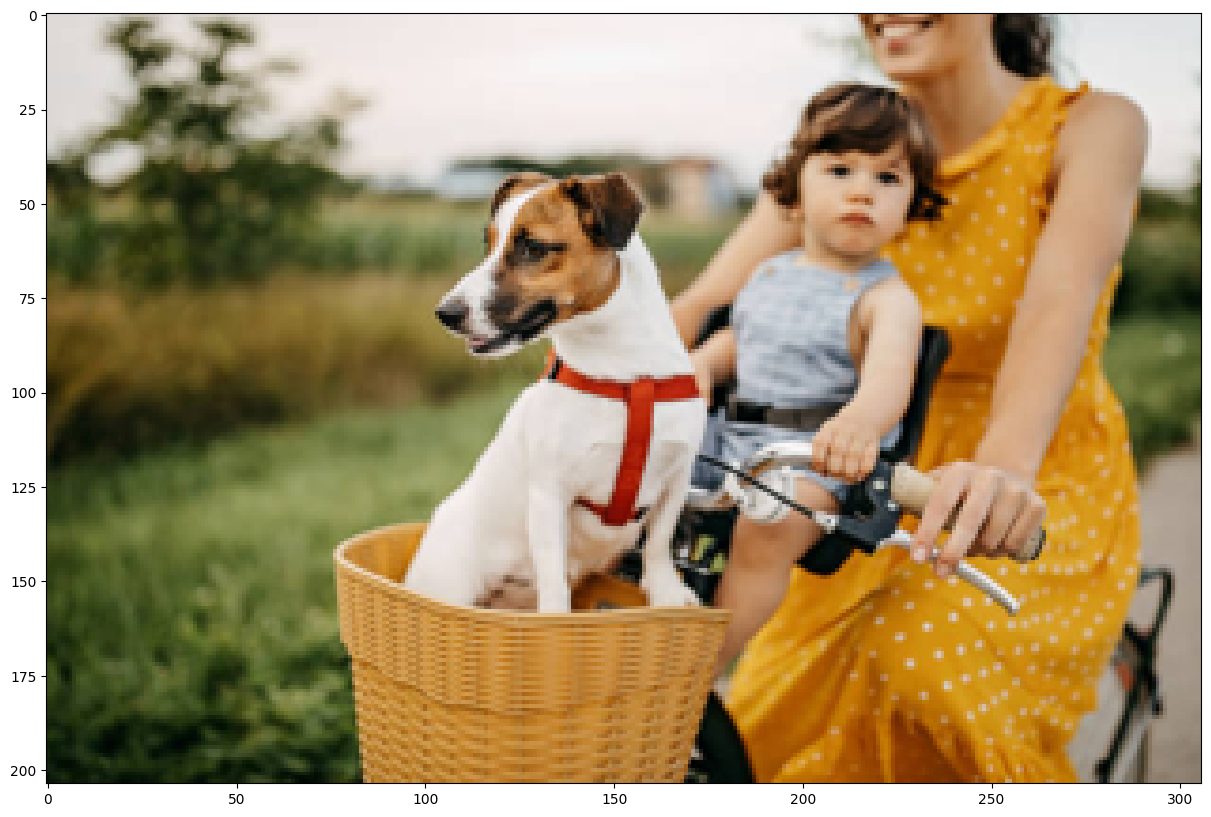

In [12]:
# img_path='cat-vs-dog.jpg'
img_path='bicycle-dog-person.jpeg'

half = 0.5
image = Image.open(img_path)

resized_image = image.resize([int(half * s) for s in image.size] )
plt.figure(figsize=(15, 10))
plt.imshow(resized_image)
plt.show()

In [13]:
transform = transforms.Compose([transforms.ToTensor()])

In [15]:
img = transform(image )
pred = model_(img.unsqueeze(0))
pred_thresh=get_predictions(pred,threshold=0.90)
pred_thresh
# draw_box(pred_thresh, img, download_image=True, img_name="Zebra_BOX")

[('dog', 0.99220276, [(183.40585, 87.07775), (361.73596, 327.04645)]),
 ('person', 0.9716248, [(335.71088, 32.18886), (488.72345, 335.06015)]),
 ('chair', 0.93652564, [(151.81316, 285.59265), (363.2032, 407.04742)]),
 ('person', 0.93411225, [(374.74747, 14.825096), (578.58514, 387.29837)])]


Label: dog
Box coordinates: 183, 87, 362, 327
Probability: 0.9922027587890625

Label: person
Box coordinates: 336, 32, 489, 335
Probability: 0.9716247916221619

Label: chair
Box coordinates: 152, 286, 363, 407
Probability: 0.9365256428718567

Label: person
Box coordinates: 375, 15, 579, 387
Probability: 0.9341122508049011
Image saved successfully


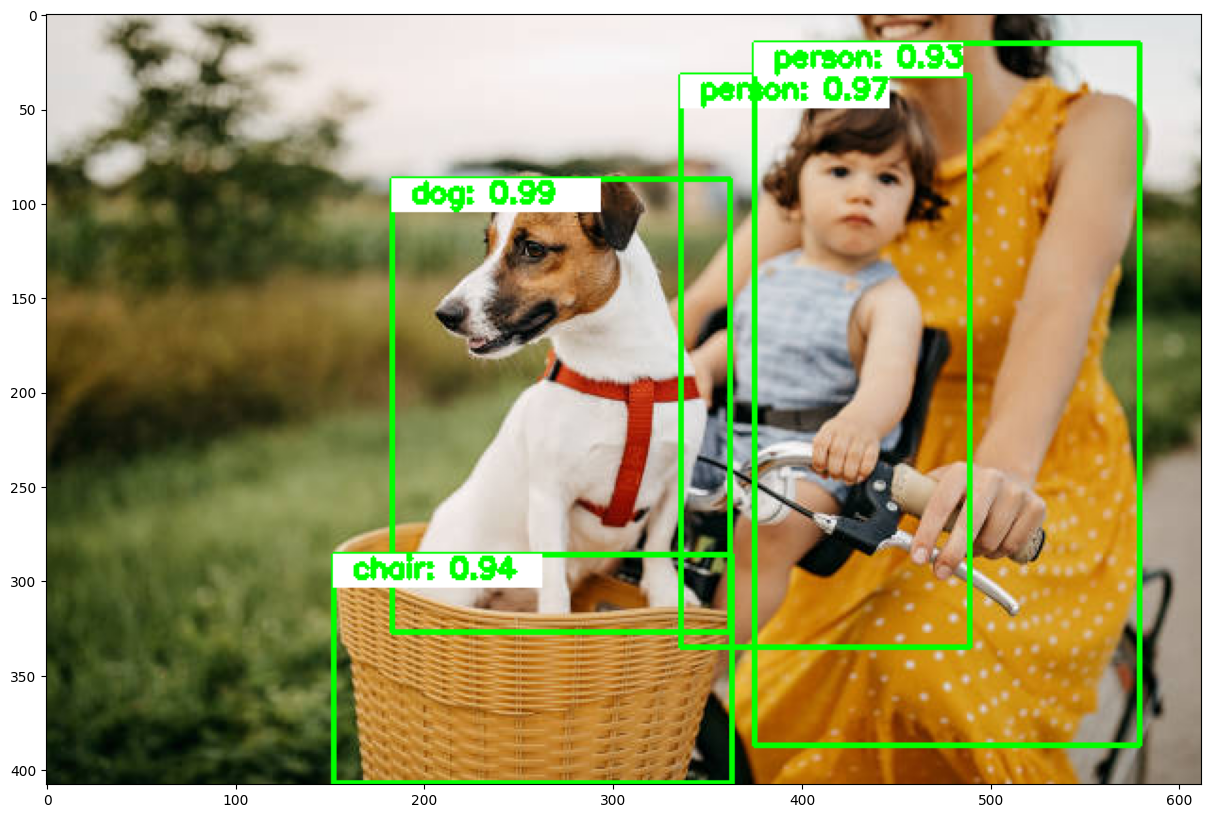

In [16]:
# draw_box(pred_thresh, img, download_image=True, img_name="cat_dog_person")
draw_box(pred_thresh, img, download_image=True, img_name="dog_person_chair")

In [17]:
pred = model_([img])

In [18]:
pred

[{'boxes': tensor([[183.4059,  87.0778, 361.7360, 327.0464],
          [335.7109,  32.1889, 488.7234, 335.0602],
          [151.8132, 285.5927, 363.2032, 407.0474],
          [374.7475,  14.8251, 578.5851, 387.2984],
          [279.2144, 296.0666, 318.7389, 317.8203],
          [354.8822, 155.7297, 496.3744, 331.3411],
          [425.8307,   1.2256, 551.5432,  90.7964],
          [359.7542, 181.0684, 522.5882, 318.3304],
          [445.6605, 166.2182, 479.2318, 245.1595],
          [422.2865,  19.5377, 557.6214, 286.7526],
          [178.0874,  70.2246, 517.8856, 346.1447],
          [547.0397, 286.6945, 596.7413, 403.1737],
          [350.9184, 171.4962, 550.3431, 390.4076],
          [191.7435, 192.9336, 385.1480, 320.6723],
          [347.4180, 183.4576, 486.9405, 295.5579],
          [549.0713, 291.9101, 597.4888, 406.6902],
          [319.5423, 159.9488, 594.8544, 396.4934],
          [328.4029,  96.4103, 402.3425, 187.7031],
          [205.8864,  45.4503, 423.7231, 327.8238],
   

In [20]:
pred[0]['labels']

tensor([18,  1, 62,  1, 60, 62,  1, 41, 62,  1, 18, 62, 62, 18,  2,  2,  4,  1,
         1, 51,  2, 62, 43, 31, 39,  3, 60, 87, 62,  1, 41, 62, 62, 41, 31, 15,
        31])

In [21]:
pred[0]['scores']

tensor([0.9922, 0.9716, 0.9365, 0.9341, 0.5134, 0.4546, 0.4273, 0.3876, 0.3573,
        0.3300, 0.3018, 0.2890, 0.2369, 0.2302, 0.1693, 0.1608, 0.1540, 0.1529,
        0.1086, 0.1048, 0.0958, 0.0930, 0.0856, 0.0808, 0.0773, 0.0764, 0.0709,
        0.0706, 0.0633, 0.0628, 0.0622, 0.0615, 0.0577, 0.0572, 0.0555, 0.0554,
        0.0518])

In [22]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'dog'

In [23]:
index=pred[0]['labels'][2].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'chair'

In [24]:
index=pred[0]['labels'][3].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'person'

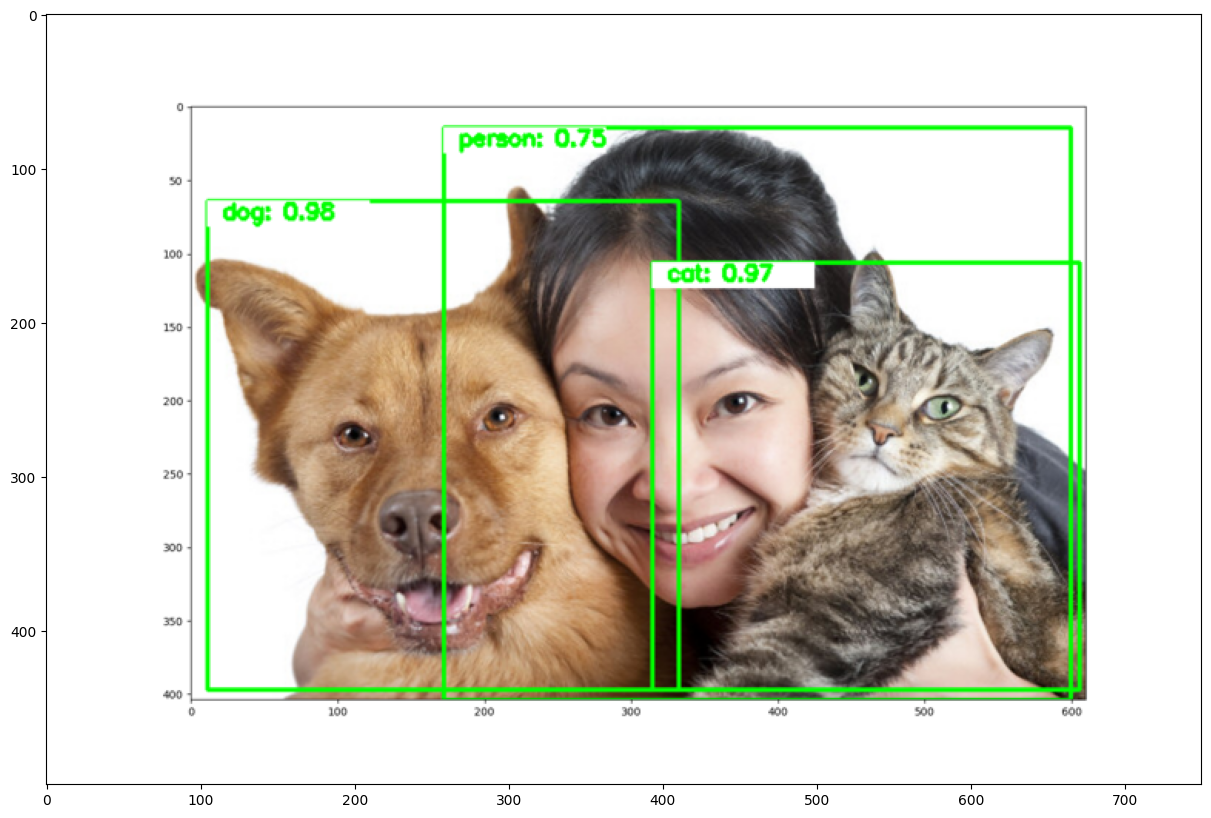

In [11]:
img_path='cat_dog_person.png'
half = 0.5
image = Image.open(img_path)

resized_image = image.resize([int(half * s) for s in image.size] )
plt.figure(figsize=(15, 10))
plt.imshow(resized_image)
plt.show()